In [2]:
import numpy as np
import matplotlib.pyplot as plt

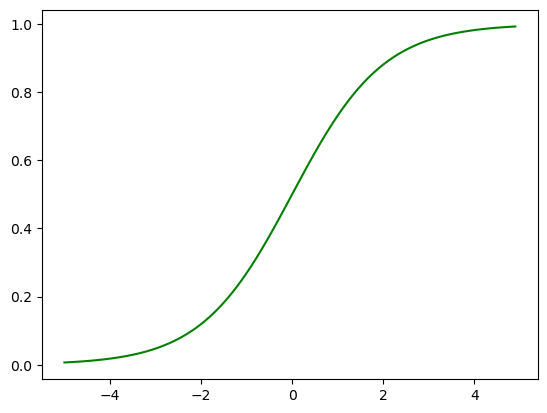

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
x = np.arange(-5, 5, 0.1)
y = sigmoid(x)
plt.plot(x, y, 'g', label='Sigmoid Function')

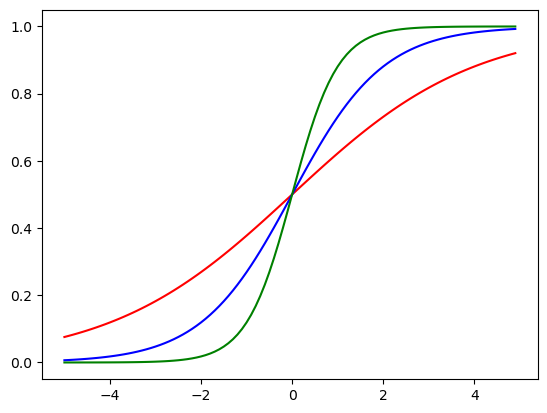

In [4]:
y1 = sigmoid(0.5 * x)
y2 = sigmoid(x)
y3 = sigmoid(2 * x)

plt.plot(x, y1, 'r', label='Sigmoid(0.5x)')
plt.plot(x, y2, 'b', label='Sigmoid(x)')
plt.plot(x, y3, 'g', label='Sigmoid(2x)')


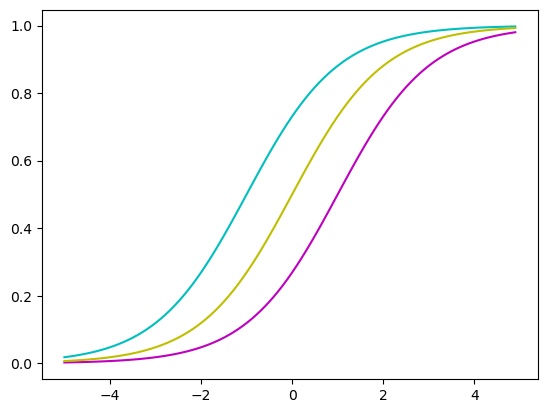

In [5]:
y1 = sigmoid(x + 1)
y2 = sigmoid(x - 1)
y3 = sigmoid(x)
plt.plot(x, y1, 'c', label='Sigmoid(x + 1)')
plt.plot(x, y2, 'm', label='Sigmoid(x - 1)')
plt.plot(x, y3, 'y', label='Sigmoid(x)')


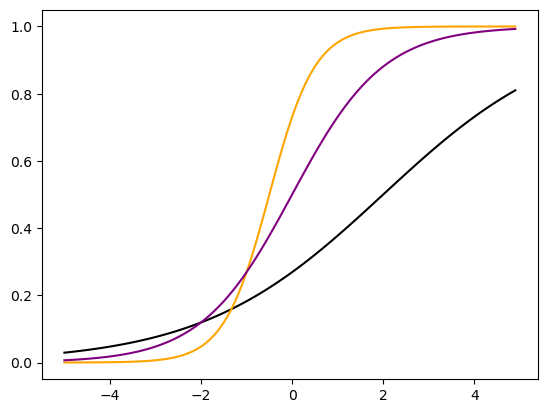

In [6]:
y1 = sigmoid(0.5*x - 1)
y2 = sigmoid(2*x + 1)
y3 = sigmoid(x)
plt.plot(x, y1, 'k', label='Sigmoid(0.5x + 1)')
plt.plot(x, y2, 'orange', label='Sigmoid(2x - 1)')
plt.plot(x, y3, 'purple', label='Sigmoid(x)')

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F


In [30]:
torch.manual_seed(0)

In [31]:
x_data = torch.FloatTensor([[1,2], [2,3], [3,1], [4, 3], [5, 3], [6, 2]])
y_data = torch.FloatTensor([[0], [0], [0], [1], [1], [1]])
print(x_data)
print(y_data)
print(x_data.shape)
print(y_data.shape)

tensor([[1., 2.],
        [2., 3.],
        [3., 1.],
        [4., 3.],
        [5., 3.],
        [6., 2.]])
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])
torch.Size([6, 2])
torch.Size([6, 1])


In [32]:
# 두가지(주석 또는 주석 바로 위의 것들) 방법중 선택
model = nn.Sequential(
    nn.Linear(2,1), # 입력변수(input_dim)는 2개, 결과값(output_diim)은 1개
    nn.Sigmoid()
)
list(model.parameters())
optimizer = optim.SGD(model.parameters(), lr=0.1)

# W = torch.zeros((2, 1), requires_grad=True)
# b = torch.zeros(1, requires_grad=True)
# optimizer = optim.SGD([W, b], lr=0.1)

In [ ]:
epochs = 100000
costs = []
for epoch in range(epochs):
    
    h = model(x_data)
    # h = torch.sigmoid(x_data.matmul(W) + b)
    
    cost = F.binary_cross_entropy(h, y_data)
    # cost = -(y_data * torch.log(h) + (1 - y_data ) * torch.log(1 - h)).mean()

    costs.append([epoch, cost.item()])
    
    optimizer.zero_grad() # Reset gradients
    cost.backward() 
    optimizer.step()

    # 주석을 사용할 때는 제외시키자
    pred = h >= torch.FloatTensor([0.5])
    correct_pred  = pred.float()==y_data
    accuracy = correct_pred.sum() / len(correct_pred)

    if epoch % 100 == 0:
        
        print(f'Epoch {epoch}, Cost : {cost.item()}')
        # print(f'Model_parameters : {list(model.parameters())}')
        # print(f'Epoch {epoch}, Cost: {cost.item()}, W: {W.data.numpy().flatten()}, b: {b.data.numpy().flatten()}')

        # 주석을 사용할 때는 제외시키자
        # print(f'Pred : {pred}')
        # print(f'h : {h}')
        # print(f'correct_pred : {correct_pred}')
        print(f'accuracy : {accuracy}')



Epoch 0, Cost : 0.6537237167358398
accuracy : 0.6666666865348816
Epoch 100, Cost : 0.3699168264865875
accuracy : 0.8333333134651184
Epoch 200, Cost : 0.3142516016960144
accuracy : 0.8333333134651184
Epoch 300, Cost : 0.27362096309661865
accuracy : 0.8333333134651184
Epoch 400, Cost : 0.24157853424549103
accuracy : 1.0
Epoch 500, Cost : 0.21585197746753693
accuracy : 1.0
Epoch 600, Cost : 0.1948794573545456
accuracy : 1.0
Epoch 700, Cost : 0.17753003537654877
accuracy : 1.0
Epoch 800, Cost : 0.16298051178455353
accuracy : 1.0
Epoch 900, Cost : 0.15062661468982697
accuracy : 1.0
Epoch 1000, Cost : 0.1400187760591507
accuracy : 1.0
Epoch 1100, Cost : 0.13081850111484528
accuracy : 1.0
Epoch 1200, Cost : 0.12276685237884521
accuracy : 1.0
Epoch 1300, Cost : 0.1156635582447052
accuracy : 1.0
Epoch 1400, Cost : 0.10935145616531372
accuracy : 1.0
Epoch 1500, Cost : 0.1037057638168335
accuracy : 1.0
Epoch 1600, Cost : 0.09862645715475082
accuracy : 1.0
Epoch 1700, Cost : 0.09403225779533386
ac

In [ ]:
# 훈련된 모델 검증용 함수
def predict(x):
    h = model(x)
    # h = torch.sigmoid(x.matmul(W) + b)

    result = []
    for i in range(len(h)):
        if h[i] >= 0.5:
            result.append(1)
        else:
            result.append(0)
    return h, result

In [36]:
# 훈련된 모델 검증(새로운값 검증하기)
h, result = predict(x_data)
print("Predicted probabilities:", h.flatten().data.numpy())
print("Predicted classes:", result)

Predicted probabilities: [1.0712420e-06 3.5613347e-03 4.1683540e-03 9.9497414e-01 9.9997854e-01
 9.9999869e-01]
Predicted classes: [0, 0, 0, 1, 1, 1]


- 이번에는 똑같은 것을 클래스를 이용하여 로지스틱회귀분석 해볼예정(딥러님때는 복잡해져서 클래스로 만들어서 사용하게 됨)

In [44]:
x_data = torch.FloatTensor([[1,2], [2,3], [3,1], [4, 3], [5, 3], [6, 2]])
y_data = torch.FloatTensor([[0], [0], [0], [1], [1], [1]])

torch.manual_seed(1)

In [45]:
# 모델 정의 클래스
class BinaryClassifier(nn.Module):
    # 모델 정의(초기 생성자 역할)
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2,1)
        self.sigmoid = nn.Sigmoid()

    # 모델을 호출하여 사용(forward는 실제 모델을 호출했을 때 실행되는 부분)
    def forward(self, x):
        return self.sigmoid(self.linear(x))    
    
# 모델 생성
model = BinaryClassifier()

In [46]:
# 최적화 설정
optimizer = optim.SGD(model.parameters(), lr=0.1)
epochs = 1000

In [47]:
# 학습
for epoch in range(epochs):
    h = model(x_data)
    cost = F.binary_cross_entropy(h, y_data)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    #정확도 계산
    pred = h > torch.FloatTensor([0.5])
    correct_pred = pred.float() == y_data
    accuracy = correct_pred.sum() / len(correct_pred)

    if epoch%10 == 0 :
        print(f'epoch : {epoch}, cost : {cost.item()}, accuracy : {accuracy*100}%')



epoch : 0, cost : 0.5397130846977234, accuracy : 83.33332824707031%
epoch : 10, cost : 0.5109191536903381, accuracy : 83.33332824707031%
epoch : 20, cost : 0.49090376496315, accuracy : 83.33332824707031%
epoch : 30, cost : 0.4750949442386627, accuracy : 83.33332824707031%
epoch : 40, cost : 0.46199920773506165, accuracy : 83.33332824707031%
epoch : 50, cost : 0.45071887969970703, accuracy : 83.33332824707031%
epoch : 60, cost : 0.4406975507736206, accuracy : 83.33332824707031%
epoch : 70, cost : 0.4315803050994873, accuracy : 83.33332824707031%
epoch : 80, cost : 0.42313501238822937, accuracy : 83.33332824707031%
epoch : 90, cost : 0.4152064323425293, accuracy : 83.33332824707031%
epoch : 100, cost : 0.4076883792877197, accuracy : 83.33332824707031%
epoch : 110, cost : 0.4005071222782135, accuracy : 83.33332824707031%
epoch : 120, cost : 0.39361023902893066, accuracy : 83.33332824707031%
epoch : 130, cost : 0.38696011900901794, accuracy : 83.33332824707031%
epoch : 140, cost : 0.380528

In [48]:
h, result = predict(x_data)
print(h)
print(result)

tensor([[0.0295],
        [0.1572],
        [0.2991],
        [0.7840],
        [0.9412],
        [0.9807]], grad_fn=<SigmoidBackward0>)
[0, 0, 0, 1, 1, 1]
